In [1]:
#Task1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

car_sales_data = pd.read_csv("../resources/HW4_Cafe_Sales.csv")
car_sales_data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Order_Time
0,TXN_2919952,Juice,NaN,3,15,Digital Wallet,In-store,2004.0
1,TXN_4265056,Juice,1,3,3,Cash,NaN,NaN
2,TXN_2463115,Sandwich,5,4,20,Credit Card,Takeaway,2071.0
3,TXN_7619641,Juice,3,3,9,NaN,In-store,2088.0
4,TXN_9566593,Cake,2,3,6,Digital Wallet,NaN,2104.0


In [2]:
# Task2
# understanding the table data
car_sales_data.info()
car_sales_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  4020 non-null   object 
 1   Item            4012 non-null   object 
 2   Quantity        3975 non-null   object 
 3   Price Per Unit  3940 non-null   object 
 4   Total Spent     3943 non-null   object 
 5   Payment Method  3495 non-null   object 
 6   Location        2725 non-null   object 
 7   Order_Time      3520 non-null   float64
dtypes: float64(1), object(7)
memory usage: 251.4+ KB


,Order_Time
count,3520.000000
mean,63483.570455
std,35777.783106
min,2004.000000
25%,32297.250000
50%,63778.500000
75%,94584.250000
max,125000.000000


In [3]:
# finding out missing values
missing_values = car_sales_data.isnull().sum()
print(f"Missing Values: \n{missing_values}")

Missing Values: 
Transaction ID       0
Item                 8
Quantity            45
Price Per Unit      80
Total Spent         77
Payment Method     525
Location          1295
Order_Time         500
dtype: int64


In [4]:
# finding duplicate values
duplicate_values = car_sales_data.duplicated().sum()
print(f"Duplicate Values: {duplicate_values}")

Duplicate Values: 20


In [5]:
# Task 3
#replacing sentinel values
car_sales_data.replace(["ERROR", "UNKNOWN"], np.nan, inplace=True)

In [6]:
# Task 4
# removing duplicate values in transaction ID
car_sales_data = car_sales_data.drop_duplicates(subset=["Transaction ID"])

In [7]:
# Task 5
# handling missing errors
missing_items = car_sales_data["Item"].isnull().sum()
percent_err = (missing_items / car_sales_data["Item"].count()) * 100
print(f"Percent of Missing Items: {percent_err:.2f}")

if percent_err < 1:
    mask = car_sales_data["Item"].isnull()
    car_sales_data = car_sales_data[ ~mask]

missing_items = car_sales_data["Item"].isnull().sum()
percent_err = (missing_items / car_sales_data["Item"].count()) * 100
print(f"Percent of Missing Items: {percent_err}")

Percent of Missing Items: 0.53
Percent of Missing Items: 0.0


In [8]:
# Task 6
# data type conversion
mask = car_sales_data.isnull()

car_sales_data["Quantity"] = car_sales_data[~mask]["Quantity"].astype(float)
car_sales_data["Price Per Unit"] = car_sales_data[~mask]["Price Per Unit"].astype(float)
car_sales_data["Total Spent"] = car_sales_data[~mask]["Total Spent"].astype(float)

car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3979 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  3979 non-null   object 
 1   Item            3979 non-null   object 
 2   Quantity        3790 non-null   float64
 3   Price Per Unit  3786 non-null   float64
 4   Total Spent     3777 non-null   float64
 5   Payment Method  3276 non-null   object 
 6   Location        2408 non-null   object 
 7   Order_Time      3485 non-null   float64
dtypes: float64(4), object(4)
memory usage: 279.8+ KB


In [9]:
#Task 7
# Build a map of prices based on unique items
price_map = car_sales_data.dropna(subset=["Price Per Unit"]).groupby("Item")["Price Per Unit"].first().to_dict()

car_sales_data["Price Per Unit"] = car_sales_data.apply(
    lambda row: price_map.get(row["Item"]) if pd.isna(row["Price Per Unit"]) else row["Price Per Unit"], axis=1)

car_sales_data.isnull().sum()

Transaction ID       0
Item                 0
Quantity           189
Price Per Unit       0
Total Spent        202
Payment Method     703
Location          1571
Order_Time         494
dtype: int64

In [10]:
# Task 7.2
car_sales_data["Total Spent"] = car_sales_data["Total Spent"].fillna(car_sales_data["Price Per Unit"] * car_sales_data["Quantity"])

car_sales_data["Quantity"] = car_sales_data["Quantity"].fillna(car_sales_data["Total Spent"] / car_sales_data["Price Per Unit"])

car_sales_data.isnull().sum()


Transaction ID       0
Item                 0
Quantity             7
Price Per Unit       0
Total Spent          7
Payment Method     703
Location          1571
Order_Time         494
dtype: int64

In [11]:
# Task 7.3
missing_percent = (car_sales_data.isnull().sum() / len(car_sales_data)) * 100

car_sales_data = car_sales_data.drop(columns=missing_percent[missing_percent > 30].index)

print(missing_percent)


Transaction ID     0.000000
Item               0.000000
Quantity           0.175924
Price Per Unit     0.000000
Total Spent        0.175924
Payment Method    17.667756
Location          39.482282
Order_Time        12.415180
dtype: float64


In [12]:
# Task 7.4
car_sales_data["Payment Method"] = car_sales_data["Payment Method"].fillna(
    car_sales_data["Payment Method"].mode()[0]
)

In [13]:
# Task 7.5
car_sales_data = car_sales_data.sort_values('Transaction ID').reset_index(drop=True)
car_sales_data['Order_Time'] = car_sales_data['Order_Time'].interpolate(method='linear', limit_direction='forward')

In [14]:
# Task 7.6
car_sales_data['Quantity'] = car_sales_data['Quantity'].fillna(
    car_sales_data.groupby('Item')['Quantity'].transform('mean')
)

In [15]:
# Task 7.7
car_sales_data['Total Spent'] = car_sales_data['Total Spent'].fillna(
    car_sales_data['Price Per Unit'] * car_sales_data['Quantity']
)

In [16]:
# Task 8
car_sales_data.isnull().sum()

Transaction ID    0
Item              0
Quantity          0
Price Per Unit    0
Total Spent       0
Payment Method    0
Order_Time        0
dtype: int64

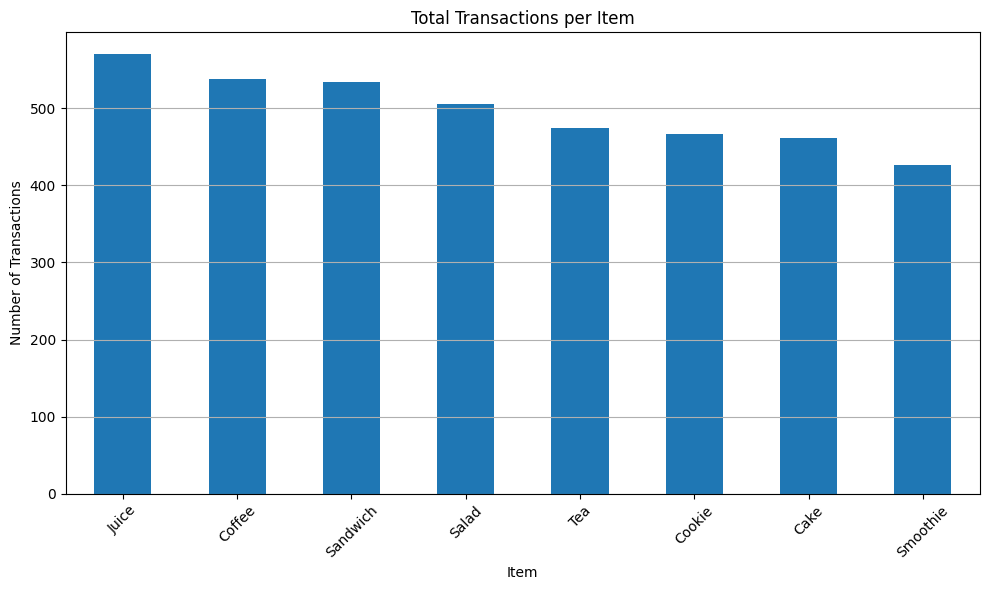

In [18]:
# Task 9.1
item_stats = car_sales_data["Item"].value_counts()
plt.figure(figsize=(10, 6))
item_stats.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Transactions per Item')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


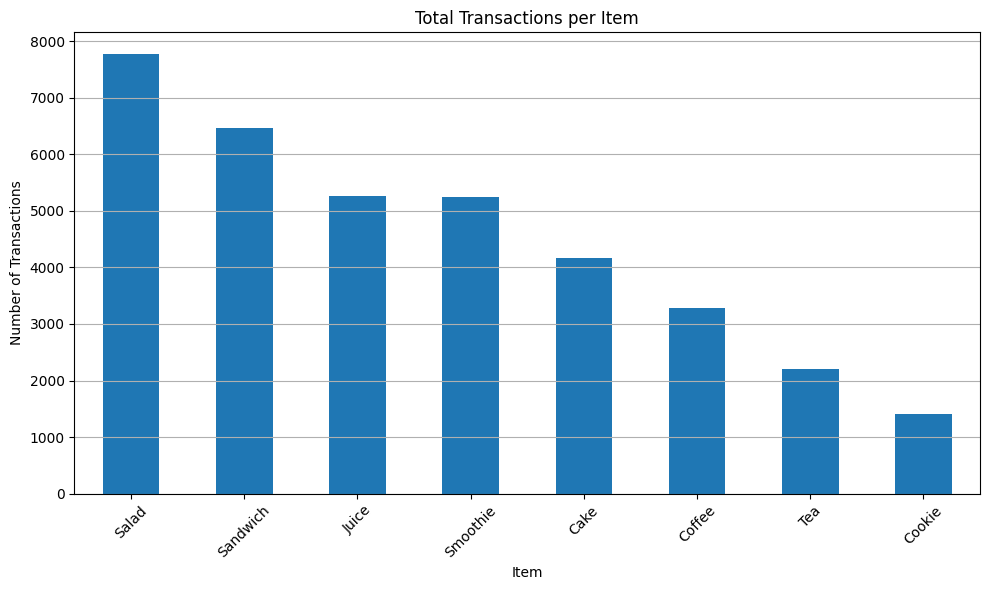

In [19]:
# Task 9.2
item_stats = car_sales_data.groupby('Item')['Total Spent'].sum()
plt.figure(figsize=(10, 6))
item_stats.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Transactions per Item')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

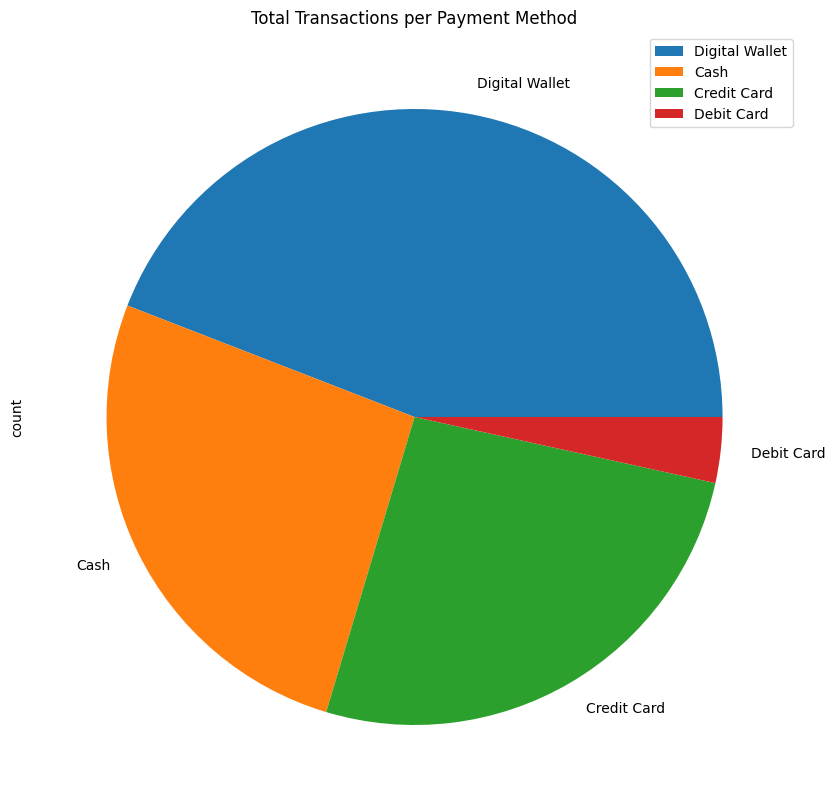

In [25]:
# Task 9.3
payment_stats = car_sales_data["Payment Method"].value_counts()
plt.figure(figsize=(12, 10))
payment_stats.plot(kind="pie")
plt.title('Total Transactions per Payment Method')
plt.legend()
plt.show();

In [26]:
# Task 10
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['<$5', '<$10', '<$15', '<$20', '>=$20']

car_sales_data['Tot_Spent Category'] = pd.cut(
    car_sales_data['Total Spent'],
    bins=bins,
    labels=labels,
    right=False
)


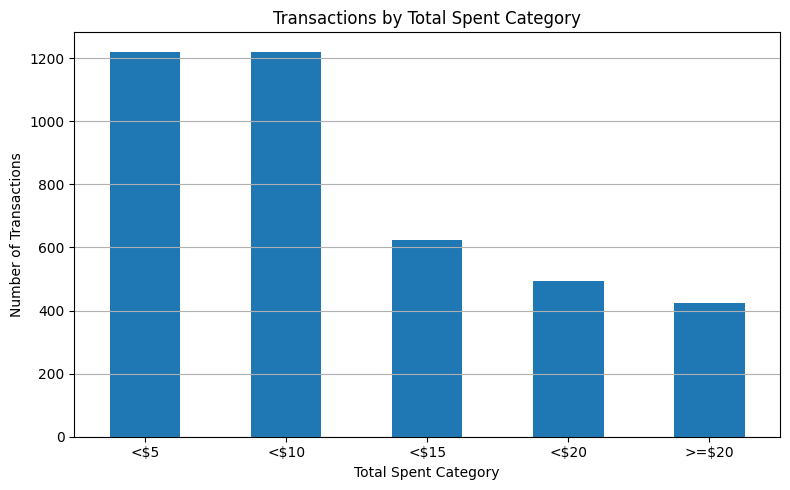

In [27]:
# Task 10.2
category_counts = car_sales_data['Tot_Spent Category'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('Transactions by Total Spent Category')
plt.xlabel('Total Spent Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [28]:
# Task 10.3
car_sales_data['Payment Codes'] = car_sales_data['Payment Method'].astype('category').cat.codes